In [1]:
#Add new directory to path to import ngs and pserm
import sys
import os
path = os.getcwd()
path_with_ngs_and_pserm = os.path.dirname(os.path.dirname(path))

sys.path.append(path_with_ngs_and_pserm)

#Imports 
import tqdm
import glob
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from ngs import NGS_round_data, NGS_DMD, common_clones
from pserm import ngs_analysis, generate_clone_set
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import spearmanr, pearsonr

#specify font properties for better export into adobe illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Add myriad pro font
fpath = "/Library/Fonts/Myriad Pro Regular.ttf"
aapath = '/Library/Fonts/cour.ttf'

prop = fm.FontProperties(fname=fpath, size = 20)
tickprop = fm.FontProperties(fname = fpath, size = 16)
aaprop = fm.FontProperties(fname = aapath, size = 16)

chemistry = {
    'A': 'black',
    'C': 'green',
    'D': 'red',
    'E': 'red',
    'F': 'black',
    'G': 'green',
    'H': 'blue',
    'I': 'black',
    'K': 'blue',
    'L': 'black',
    'M': 'black',
    'N': 'purple',
    'P': 'black',
    'Q': 'purple',
    'R': 'blue',
    'S': 'green',
    'T': 'green',
    'V': 'black',
    'W': 'black',
    'Y': 'green'
}

NGS package imported


In [2]:
p1_wt = 'YRRRGAWY'

p1_muts_no_wt = {
0: ['A', 'D', 'F', 'S', 'V'],
1: ['A', 'E', 'G', 'K', 'T'],
2: ['A', 'E', 'G', 'K', 'T'],
3: ['A', 'E', 'G', 'K', 'T'],
4: ['A', 'D', 'N', 'S', 'T'],
5: ['D', 'F', 'S', 'V', 'Y'],
6: ['L', 'G', 'V', 'S', 'A'],
7: ['A', 'D', 'F', 'S', 'V']
}

p1_r1 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 
        'Ins_P', 'Ins_N', 'Ova_P', 'Ova_N'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_1', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_r2 = NGS_round_data(
    Round = 3, 
    sequence_type = 'mutations', 
    samples =[
        'Input', 'Ag1_P', 'Ag01_P', 'DA_P', 'PSR_P', 'PSR_N', 'PSR_NB', 
        'Ins_P', 'Ins_NS', 'Ins_NB', 'Ova_P', 'Ova_N', 'Ova_NB'],
    sample_of_interest = 'Input', 
    path = '../Input_Datasets/Project_1/Rep_2', 
    wild_type = p1_wt, 
    mutations_dict = p1_muts_no_wt
)

p1_clone_set_trimmed_r1 = generate_clone_set(p1_r1, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed_r2 = generate_clone_set(p1_r2, ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N', 'Ins_P'])
p1_clone_set_trimmed = list(set(p1_clone_set_trimmed_r1).union(set(p1_clone_set_trimmed_r2)))

p1_data = ngs_analysis([p1_r1, p1_r2], ['Input', 'Ag1_P', 'Ag01_P', 'PSR_P', 'PSR_N', 'Ova_P', 'Ova_N'], clone_set = p1_clone_set_trimmed)

p1_data.generate_D()

for pssm in glob.glob('../Project_PSSMs/Project_1/*.xlsx'):
    p1_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for ppm in glob.glob('../Project_PPMs/Project_1/*.xlsx'):    
    p1_data.load_ppm(ppm.split('.xlsx')[0].split('/')[-1], ppm, excel_or_csv = 'excel')

for sample in p1_data.samples:
    if sample != 'Input':
        p1_data.generate_PSERM(In_sample = 'Input', Out_sample = sample)


['Mutation_139624.csv', 'Mutation_139625.csv', 'Mutation_139626.csv', 'Mutation_139627.csv', 'Mutation_139628.csv', 'Mutation_139629.csv', 'Mutation_139630.csv', 'Mutation_139631.csv', 'Mutation_139632.csv', 'Mutation_139633.csv']
['Mutation_140403.csv', 'Mutation_140404.csv', 'Mutation_140405.csv', 'Mutation_140406.csv', 'Mutation_140407.csv', 'Mutation_140408.csv', 'Mutation_140409.csv', 'Mutation_140410.csv', 'Mutation_140411.csv', 'Mutation_140412.csv', 'Mutation_140413.csv', 'Mutation_140414.csv', 'Mutation_140415.csv']


100%|██████████| 774931/774931 [00:01<00:00, 585755.37it/s]


## Create fixed residue PSSM

In [3]:
for pos, aalist in tqdm.tqdm(p1_data.library.items()):
    for aa in aalist:
        p1_data.generate_fixed_resi_PSSM('Input', pos, aa)
        p1_data.generate_fixed_resi_PSSM('Ag01_P', pos, aa)
        p1_data.generate_fixed_resi_PSSM('Ova_P', pos, aa)
        p1_data.generate_fixed_resi_PSSM('PSR_P', pos, aa)
        p1_data.generate_fixed_resi_PSSM('Ag1_P', pos, aa)
        p1_data.generate_fixed_resi_PSSM('Ova_N', pos, aa)
        p1_data.generate_fixed_resi_PSSM('PSR_N', pos, aa)

        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag01_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ova_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_PSR_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag1_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ova_N')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_PSR_N')

100%|██████████| 1229763/1229763 [00:03<00:00, 385225.26it/s]


Generating MSA.


100%|██████████| 8/8 [40:25<00:00, 303.19s/it]


In [4]:
for pos, aalist in p1_data.library.items():
    for aa in aalist:
        p1_data.PSSM[f'{pos}_{aa}_Input'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_Input.xlsx')
        p1_data.PSSM[f'{pos}_{aa}_Ag01_P'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_Ag01_P.xlsx')
        p1_data.PSSM[f'{pos}_{aa}_Ag1_P'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_Ag1_P.xlsx')
        p1_data.PSSM[f'{pos}_{aa}_Ova_P'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_Ova_P.xlsx')
        p1_data.PSSM[f'{pos}_{aa}_Ova_N'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_Ova_N.xlsx')
        p1_data.PSSM[f'{pos}_{aa}_PSR_P'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_PSR_P.xlsx')
        p1_data.PSSM[f'{pos}_{aa}_PSR_N'].to_excel(f'../Project_PSSMs/Project_1/Fixed_Residue_PSSM/{pos}_{aa}_PSR_N.xlsx')

# Load fixed residue PSSM

In [3]:
for pssm in glob.glob('../Project_PSSMs/Project_1/Fixed_Residue_PSSM/*.xlsx'):
    p1_data.load_pssm(pssm.split('.xlsx')[0].split('/')[-1], pssm, excel_or_csv = 'excel')

for pos, aalist in tqdm.tqdm(p1_data.library.items()):
    for aa in aalist:
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag01_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ag1_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_Ova_P')
        p1_data.generate_PSERM(In_sample = f'{pos}_{aa}_Input', Out_sample = f'{pos}_{aa}_PSR_P')

100%|██████████| 8/8 [00:00<00:00, 236.90it/s]


In [5]:
p1_data.get_all_mut_JS_divergence_matrix('Ag01_P')
p1_data.get_all_mut_JS_divergence_matrix('Ag1_P')
p1_data.get_all_mut_JS_divergence_matrix('Ova_P')
p1_data.get_all_mut_JS_divergence_matrix('PSR_P')
#p1_data.get_all_mut_JS_divergence_matrix('Ova_N')
#p1_data.get_all_mut_JS_divergence_matrix('PSR_N')

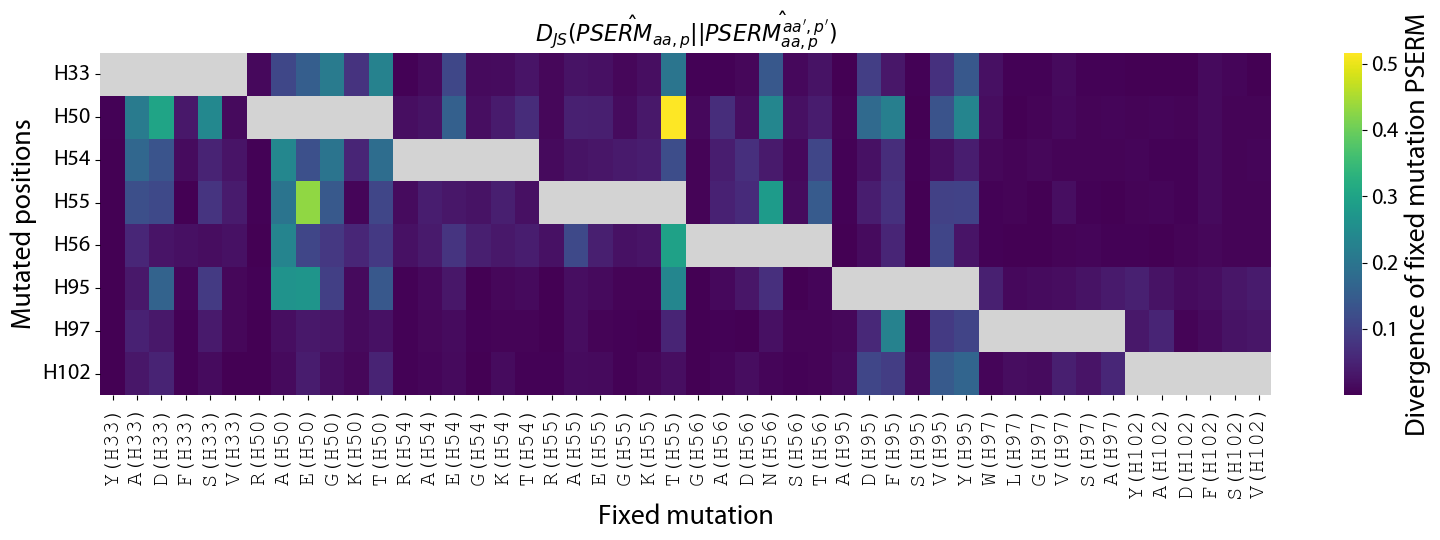

In [6]:
fig, ax = plt.subplots(figsize = (7.2 *2.2, 5.5))
############# Plot Heatmap of DJS ####################
ag_mask = np.zeros_like(p1_data.JS_data['Ag01_P'])
row = 0
for j in range(len(p1_data.wt)):
    for _ in range(len(p1_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

sns.heatmap(p1_data.JS_data['Ag01_P'].T, mask = ag_mask.T, ax = ax, cmap = 'viridis')#, cbar_kws={"shrink": 0.55})
ax.set_facecolor('lightgrey')

mutated_pos = ['H33', 'H50', 'H54', 'H55', 'H56', 'H95', 'H97', 'H102']

current_xticks = ax.get_xticklabels()
new_yticks = [
    f"{t.get_text().split('_')[1]}({mutated_pos[int(t.get_text().split('_')[0])]})" for t in current_xticks]

ax.set_ylabel('Mutated positions', fontproperties = prop)
ax.set_xlabel('Fixed mutation', fontproperties = prop)

ax.set_xticklabels(new_yticks)
ax.set_yticks([i +0.5 for i in range(len(mutated_pos))], mutated_pos, fontproperties = tickprop, rotation = 0)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(aaprop)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = prop)
for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title, fontproperties = tickprop)

plt.tight_layout()
#plt.savefig('Fig S3 All mutations Ag JS divergence.pdf')
plt.show()

# Figure 6

In [12]:
def create_contextual_dependence(ngs_analysis, sample, plots_data, corr_loc, fname = None, show = True, mut_pos = None, num_ticks = None, reagent = 'Ag01_P'):
    fig = plt.figure(figsize = (7.2*1.25, 6*1.25))
    gs = matplotlib.gridspec.GridSpec(2, 2)
    
    ngs_analysis.get_all_mut_JS_divergence_matrix(sample)    
    
    mask = np.zeros_like(ngs_analysis.JS_data[sample])
    row = 0
    for j in range(len(ngs_analysis.wt)):
        for _ in range(len(ngs_analysis.library[j])):
            mask[row, j] = 1
            row += 1
    ################## PLOT LOW/HIGH DJS scores #####################

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    axs = [ax1, ax2]

    plots = {}
    for i, (k, data) in enumerate(plots_data.items()):
        plots[k] = [data[0], data[1], axs[i], data[2]]

    for plot_data in plots.values(): 
        pos, seq_set_key, ax, ylabel = plot_data
        ax.hlines([0], -10, 100, color = 'k')
        ax.vlines([0], -10, 100, color = 'k')

        for aa in ngs_analysis.library[pos]:
            m = f"${aa}$"
            color = chemistry[aa]
            
            ax.plot(
                ngs_analysis.PSERM[sample].loc[aa, pos], 
                ngs_analysis.PSERM[f'{seq_set_key}_{reagent}'].loc[aa, pos], 
                marker = m, markersize = 10, color = color)
        if mut_pos is not None:
            label = 'PSERM site-specific scores'+'\nVH residue '+f'{mut_pos[pos]}'
        else:
            label = 'PSERM site-specific scores'+'\nVH residue '+f'{pos}'
            
        ax.plot([-100, 100], [-100, 100], '--', alpha = 0.4, color = 'black', label = label)        
        
        legend = ax.legend(loc = 1, prop = tickprop, edgecolor = 'white', handlelength=0, handletextpad=0)
        for marker in legend.legendHandles:
            marker.set_visible(False)     
        
        pp = seq_set_key.split('_')[0]
        aap = seq_set_key.split('_')[1]

        ax.set_ylabel(ylabel, fontproperties = tickprop)
        ax.set_xlabel(f'Scores without fixed residue', fontproperties = tickprop)
        
        x_min = min(ngs_analysis.PSERM[sample].loc[:, pos]) 
        x_max = max(ngs_analysis.PSERM[sample].loc[:, pos])
        y_min = min(ngs_analysis.PSERM[f'{seq_set_key}_{reagent}'].loc[ngs_analysis.library[pos], pos]) 
        y_max = max(ngs_analysis.PSERM[f'{seq_set_key}_{reagent}'].loc[ngs_analysis.library[pos], pos])

        mmin = min(x_min, y_min)
        mmax = max(x_max, y_max)
        
        ax.set_xlim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))
        ax.set_ylim(mmin - 0.2*abs(mmin), mmax + 0.2*abs(mmax))
        if num_ticks is None:
            num_ticks = 4
        ax.set_xticks(np.linspace(round(mmin * 2)/2, round(mmax * 2)/2, num_ticks))
        ax.set_yticks(np.linspace(round(mmin * 2)/2, round(mmax * 2)/2, num_ticks))
        
        for tick in ax.get_xticklabels():
            tick.set_fontproperties(tickprop)
        for tick in ax.get_yticklabels():
            tick.set_fontproperties(tickprop)

    #################### PLOT DJS vs PSERM #################

    ax3 = fig.add_subplot(gs[1::, :])
    ax3.set_xlabel(r'PSERM site-specific scores without fixed residue', fontproperties = prop)

    ax3_ylabel = 'Total contextual dependence\n'
    ax3.set_ylabel(ax3_ylabel, fontproperties = tickprop)
    ax3.plot

    x, y = [], []
    for pos, aa_list in ngs_analysis.library.items():
        for aa in aa_list:
            x.append(ngs_analysis.PSERM[sample].loc[aa, pos])
            y.append(((1 - mask) * ngs_analysis.JS_data[sample]).loc[f'{pos}_{aa}', :].sum())
            if mut_pos is not None:
                ax3.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${aa}{mut_pos[pos]}$', markersize = 18)
            else:
                ax3.plot(x[-1], y[-1], color = chemistry[aa], marker = f'${aa}{pos}$', markersize = 18)

    r, p = spearmanr(x, y)
    corr_text = r"Spearman's $\rho$ = " + f'{r:.3}\n' + f'p-value = {p:.3}'
    ax3.annotate(corr_text, corr_loc, fontproperties = prop)
    
    ax3.set_yticks(np.linspace(round(min(y) * 2)/2, round(max(y) * 2)/2, num_ticks))
    for tick in ax3.get_xticklabels():
        tick.set_fontproperties(tickprop)
    for tick in ax3.get_yticklabels():
        tick.set_fontproperties(tickprop)

    plt.tight_layout()
    if fname is not None:
        if not fname.endswith('.pdf'):
            fname = f'{fname}.pdf'
        else:
            plt.savefig(fname, transparent = True)
    if show:
        plt.show()


/var/folders/_k/l4n5p27503v3vnw_5p9dvdsw0000gn/T/ipykernel_53289/3631927568.py:44: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for marker in legend.legendHandles:
/var/folders/_k/l4n5p27503v3vnw_5p9dvdsw0000gn/T/ipykernel_53289/3631927568.py:44: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for marker in legend.legendHandles:


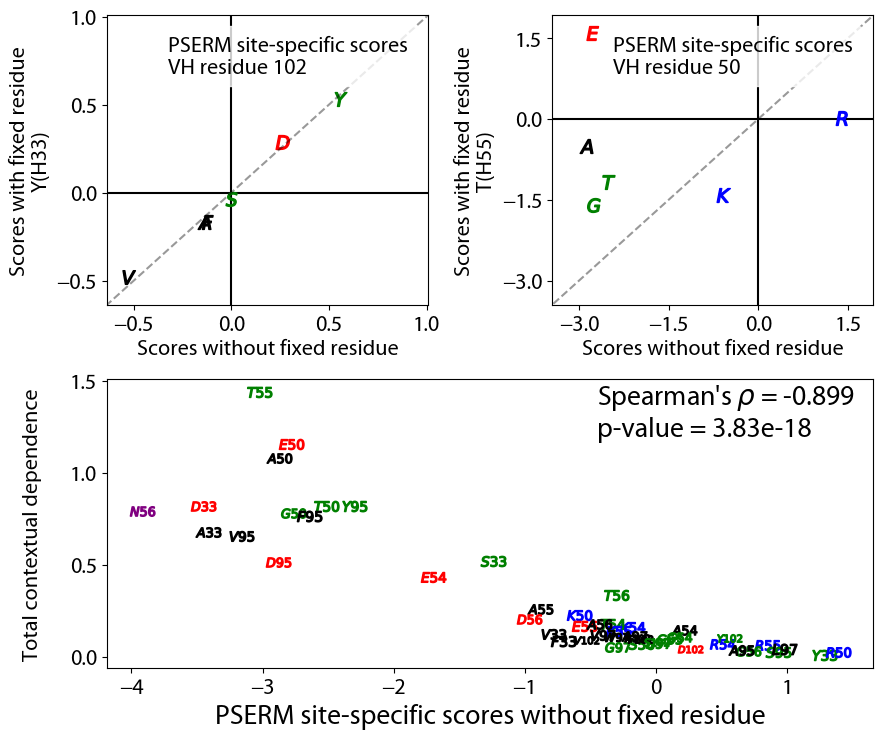

In [13]:
corr_loc = (-.45, 1.2)

plots = {
    0: [7, '0_Y', 'Scores with fixed residue\nY(H33)'],
    1: [1, '3_T', 'Scores with fixed residue\nT(H55)']
}

create_contextual_dependence(
    ngs_analysis = p1_data, sample = 'Ag01_P', plots_data = plots, corr_loc = corr_loc, 
    fname = 'Fig 6. Contextual Preference.pdf', 
    mut_pos=['33', '50', '54', '55', '56', '95', '97', '102'], 
    reagent = 'Ag01_P')

bdat NOT subset; don't know how to subset; dropped
bloc NOT subset; don't know how to subset; dropped
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


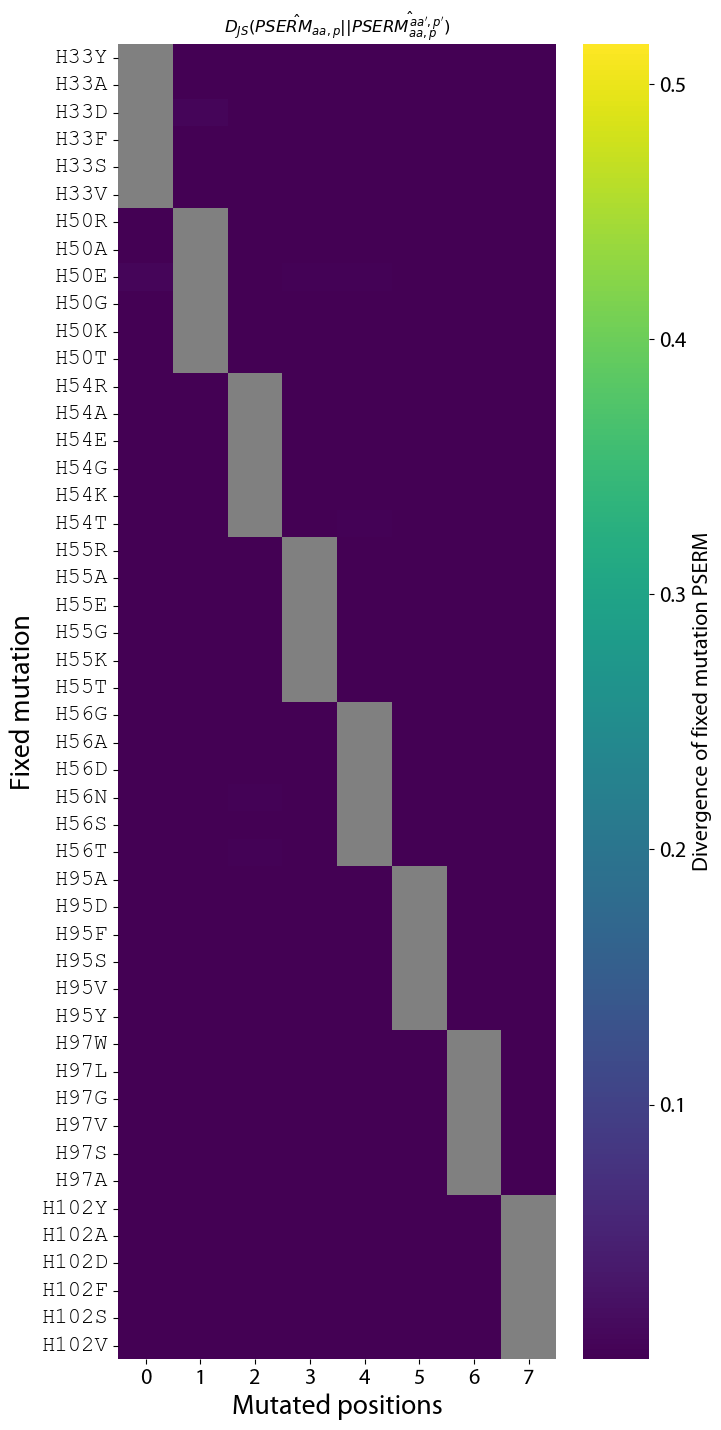

In [24]:
fig, ax = plt.subplots(figsize = (7.2 , 7.2 * 2))
############# Plot Heatmap of DJS ####################
ag_mask = np.zeros_like(p1_data.JS_data['Ova_P'])
row = 0
for j in range(len(p1_data.wt)):
    for _ in range(len(p1_data.library[j])):
        ag_mask[row, j] = 1
        row += 1

#set ylim to ag01_P min and max to show how little context matters for Ova
cmin = p1_data.JS_data['Ag01_P'].min().min()
cmax = p1_data.JS_data['Ag01_P'].max().max()

sns.heatmap(p1_data.JS_data['Ova_P'], mask = ag_mask, ax = ax, cmap = 'viridis', vmin = cmin, vmax = cmax)
ax.set_facecolor('grey')

mutated_pos = ['H33', 'H50', 'H54', 'H55', 'H56', 'H95', 'H97', 'H102']

current_yticks = ax.get_yticklabels()
new_yticks = [
    f"{mutated_pos[int(t.get_text().split('_')[0])]}{t.get_text().split('_')[1]}" for t in current_yticks]

ax.set_xlabel('Mutated positions', fontproperties = prop)
ax.set_ylabel('Fixed mutation', fontproperties = prop)
ax.set_yticklabels(new_yticks)

for tick in ax.get_xticklabels():
    tick.set_fontproperties(tickprop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(aaprop)
    tick.set_rotation(0)

cbar_label = r"Divergence of fixed mutation PSERM" 
ax_title = r"$\hat{D_{JS}(PSERM_{aa,p}}||\hat{PSERM^{aa',p'}_{aa,p}})$"

colorbar = ax.collections[0].colorbar
colorbar.set_label(cbar_label, fontproperties = tickprop)

for tick in colorbar.ax.get_yticklabels():
    tick.set_fontproperties(tickprop)
ax.set_title(ax_title)

plt.tight_layout()
plt.savefig('Fig S3 All mutations Ova JS divergence.pdf')
plt.show()